## Predict Heart Disease

In [1]:
#Packages
#Data
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
#Graphs
import matplotlib.pyplot as plt
import seaborn as sns
# Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

#### Upload data

In [2]:
# Import code from Datasource

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 

# data (as pandas dataframes) 
X = heart_disease.data.features 
y1 = heart_disease.data.targets 

#### Clean and EDA

In [3]:
# Copy date
heart_data = X.copy()

In [4]:
# If they have heart disease
y1.head(5)

,num
0,0
1,2
2,1
3,0
4,0


In [5]:
# Check unique values
y1.value_counts()

num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64

In [6]:
# Change all levels of heart disease to binary
heart_data['Heart Disease'] = y1['num'].replace([1,2,3,4], 1)

In [7]:
# Check Values
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [8]:
#Check NAs
heart_data.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               4
thal             2
Heart Disease    0
dtype: int64

In [9]:
# Not many NAs, but drop for model
heart_data = heart_data.dropna()

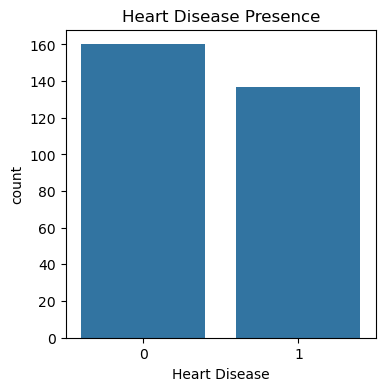

In [10]:
#Figure Size
plt.figure(figsize=(4,4))
# Bar chart of people with and without heart disease
sns.countplot(x='Heart Disease', data=heart_data)
# Title
plt.title('Heart Disease Presence')
# Show graph
plt.show()

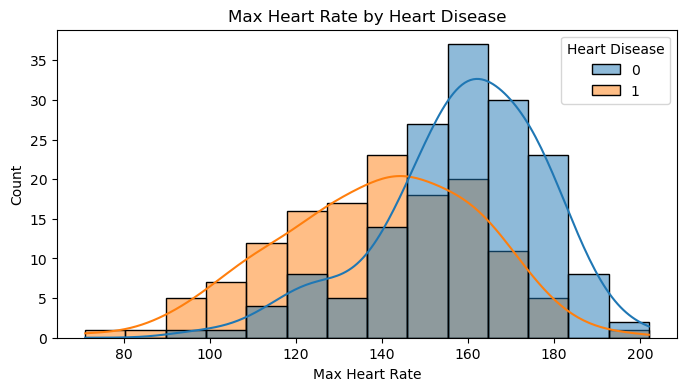

In [11]:
# Figure size
plt.figure(figsize=(8,4))
# Check the ranges of ages to know if it is distributed
sns.histplot(data=heart_data, x="thalach", hue="Heart Disease", kde=True)
# Axis Label
plt.xlabel("Max Heart Rate")
# Title
plt.title('Max Heart Rate by Heart Disease')
#Show Graph
plt.show()

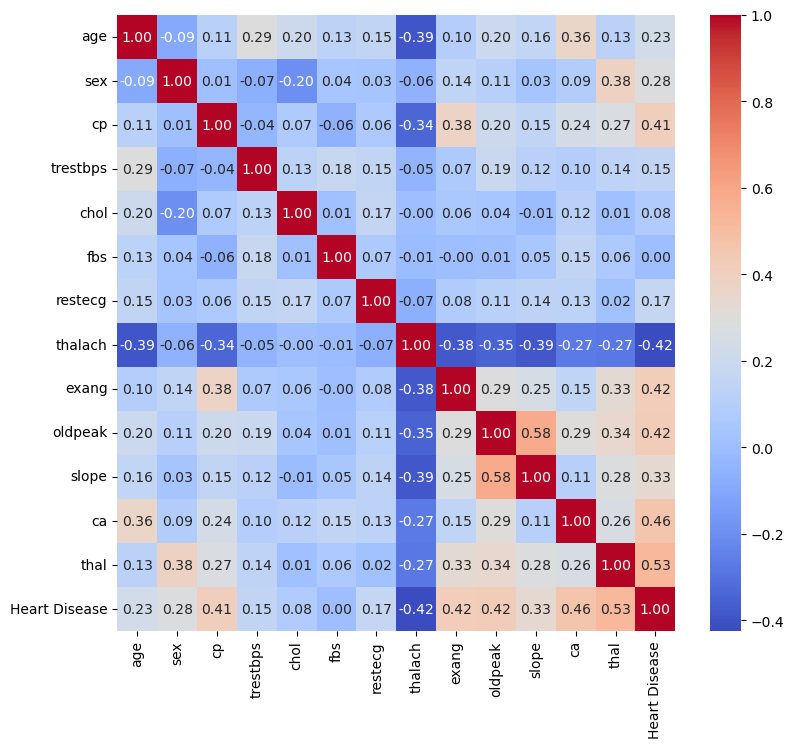

In [12]:
# Figure Size
plt.figure(figsize=(9,8))
# Heatmap to find what correlates with heart disease. Round. Change color to an easy to read color.
sns.heatmap(heart_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
#Show results
plt.show()

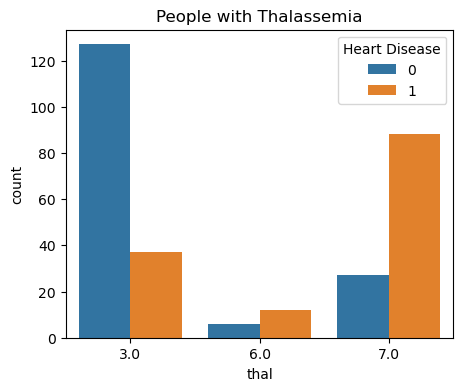

In [13]:
# Figure size
plt.figure(figsize=(5,4))
# Count of the number of major blood vessels visible during imaging
sns.countplot(x='thal', hue='Heart Disease', data=heart_data)
# Title
plt.title('People with Thalassemia')
# Show Graph
plt.show()

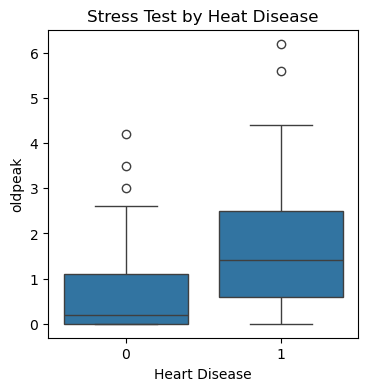

In [14]:
# Figure Size
plt.figure(figsize=(4,4))
# Check 
sns.boxplot(x='Heart Disease', y='oldpeak', data=heart_data)
# Title
plt.title('Stress Test by Heat Disease')
# Show Graph
plt.show()

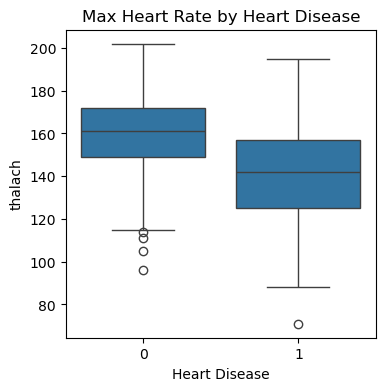

In [15]:
# Figure Size
plt.figure(figsize=(4,4))
# Max Heart RateBox Plot
sns.boxplot(x='Heart Disease', y='thalach', data=heart_data)
# Title
plt.title('Max Heart Rate by Heart Disease')
# Show Results
plt.show()

#### Train Model and Results

##### Logistic Regression

In [16]:
#Split y
y = heart_data['Heart Disease']
X = heart_data.drop(columns = ['Heart Disease'])

In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Allow scaler
scaler = StandardScaler()

In [19]:
# Fit and transform only training data
X_train_s = scaler.fit_transform(X_train)
# Transform test data
X_test_s = scaler.transform(X_test)  

In [20]:
# Allow Logistic Regression
lg = LogisticRegression(max_iter=1000)

In [21]:
# Fit Model
lg.fit(X_train_s, y_train);

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [22]:
# Logistic Regression Predict
y_pred_lr = lg.predict(X_test_s)

In [23]:
# Print results
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



Results are good, but see if random forest does better.

#### Random Forest

In [24]:
# Allow Random Forest
rf = RandomForestClassifier(random_state=42, max_depth=5)

In [25]:
# Fit model
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
# Predict results
y_pred_rf= rf.predict(X_test)

In [27]:
# Print Results
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



#### Random Forest - GridSearch

In [28]:
#Split y
y = heart_data['Heart Disease']
X = heart_data.drop(columns = ['Heart Disease'])

In [29]:
# Test different param
param_grid = {'n_estimators': [25, 50, 100], 
              'max_depth': [None, 5, 10, 15], 
              'max_features': ['sqrt', 'log2'],
              'min_samples_split': [2, 5, 10]}

In [30]:
# Grid search
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

In [31]:
# Fit on training data
grid_search.fit(X_train, y_train);

In [32]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 25}


In [33]:
# Save the best model
best_rf = grid_search.best_estimator_

In [34]:
# Predict results
y_pred = best_rf.predict(X_test)

In [35]:
print("Random Forest - GridSearch \nClassfication Report:\n", classification_report(y_test, y_pred))

Random Forest - GridSearch 
Classfication Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92        36
           1       0.91      0.83      0.87        24

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.90      0.90      0.90        60



In [36]:
# Predict the train and test results
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [37]:
# Test train accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [39]:
# Print results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9240506329113924
Test Accuracy: 0.8666666666666667


Results improved a little, but see if they can imporve more.

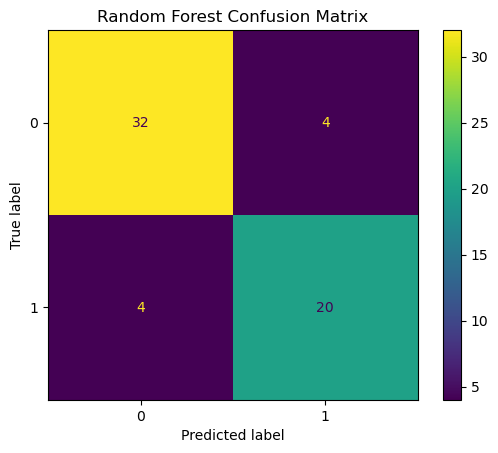

In [40]:
# Confusion Matrix for random forest
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
# Title
plt.title('Random Forest Confusion Matrix')
# Show Results
plt.show()

Gridsearch decreased the results. Best results,first random forest.

In [41]:
# Pull the features with the largest impact
importances = rf.feature_importances_

In [42]:
# Rename to read graph
r_dict = {'age': 'Age',
          'sex': 'Sex (1=Male)',
          'cp': 'Chest Pain Type',
          'trestbps': 'Resting BP',
          'chol': 'Cholesterol',
          'fbs': 'Fasting Blood Sugar',
          'restecg': 'Resting ECG Results',
          'thalach': 'Max Heart Rate',
          'exang': 'Exercise Induced Angina',
          'oldpeak': 'ST Depression (Oldpeak)',
          'slope': 'Slope of ST Segment',
          'ca': 'Major Vessels Colored',
          'thal': 'Thalassemia Type'}

In [43]:
# Save list of column names
feat_names = X.columns

In [44]:
# Make values into a series in order from highest to lowest
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

In [45]:
# Rename columns
feat_imp_r = feat_imp.rename(index=r_dict)

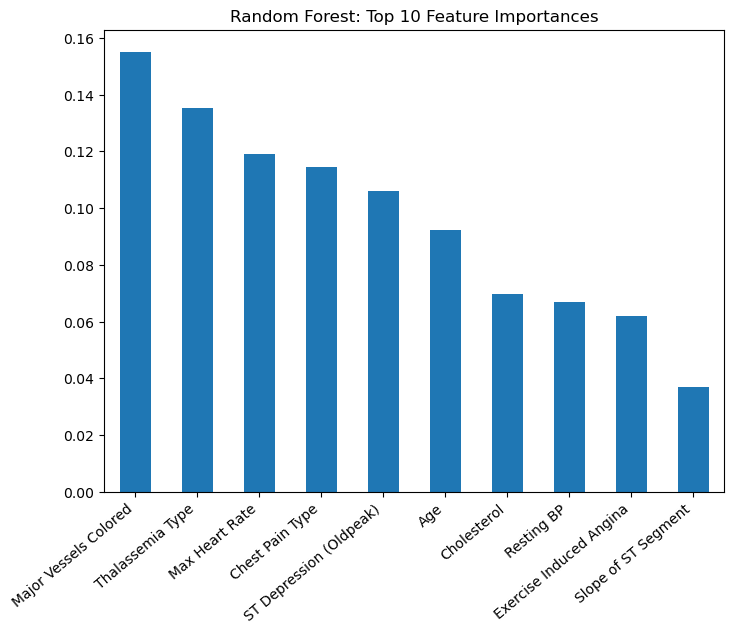

In [46]:
# Figure size
plt.figure(figsize=(8,6))
# bar graph of top 10 features
feat_imp_r.head(10).plot(kind='bar')
# Turn labels and align
plt.xticks(rotation=40, ha='right')
# Title
plt.title('Random Forest: Top 10 Feature Importances')
# Show Results
plt.show()